## Soru 1

Bu alıştırmada, modelinizi kullanarak konut fiyatlarını tahmin edeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Ev Fiyatları verilerini Kaggle'dan indirin.
Verilerinizi eğitim ve test kümelerine ayırın.
Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.
Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.
Modelinizin performansı tatmin edici mi? Açıklayın.
Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("trainh.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df.drop([ 'PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu', 'PoolQC', 'MiscFeature'], axis = 1)

In [4]:
df.dropna(inplace=True)

In [5]:
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", 'GarageCars', 'GarageArea', 'FullBath', 'YearBuilt', 'LotArea', 'PoolArea', 'YearRemodAdd']]
X.head()


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,FullBath,YearBuilt,LotArea,PoolArea,YearRemodAdd
0,7,856,856,1710,2,548,2,2003,8450,0,2003
1,6,1262,1262,1262,2,460,2,1976,9600,0,1976
2,7,920,920,1786,2,608,2,2001,11250,0,2002
3,7,756,961,1717,3,642,1,1915,9550,0,1970
4,8,1145,1145,2198,3,836,2,2000,14260,0,2000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Eğtim gözlem sayısı: {}'.format(X_train.shape[0]))
print('Test gözlem sayısı: {}'.format(X_test.shape[0]))

Eğtim gözlem sayısı: 875
Test gözlem sayısı: 219


## Model 1

In [9]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     242.0
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          7.43e-255
Time:                        22:12:16   Log-Likelihood:                -10542.
No. Observations:                 875   AIC:                         2.111e+04
Df Residuals:                     863   BIC:                         2.117e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.289e+06   1.84e+05     -7.017      0.000   -1.65e+06   -9.29e+05
OverallQual   2.201e+04   1744.495     12.619      0.000    1.86e+04    2.54e+04
TotalBsmtSF      2.5671      8.829      0.291      0.771     -14.762      19.896
1stFlrSF        19.7420      9.393      2.102      0.036       1.306      38.178
GrLivArea       53.3112      4.449     11.983      0.000      44.579      62.043
GarageCars    1.404e+04   4386.251      3.202      0.001    5434.254    2.27e+04
GarageArea      12.4531     14.222      0.876      0.381     -15.460      40.367
FullBath     -7995.0626   3880.080     -2.061      0.040   -1.56e+04    -379.565
YearBuilt      291.2622     72.227      4.033      0.000     149.501     433.024
LotArea          0.6258      0.176      3.554      0.000       0.280       0.971
PoolArea       -49.2908     38.587     -1.277      0.202    -125.026      26.444
YearRemodAdd   317.0361     92.721      3.419      0.001     135.052     499.020
==============================================================================
Omnibus:                      290.693   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31110.589
Skew:                          -0.424   Prob(JB):                         0.00
Kurtosis:                      32.199   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

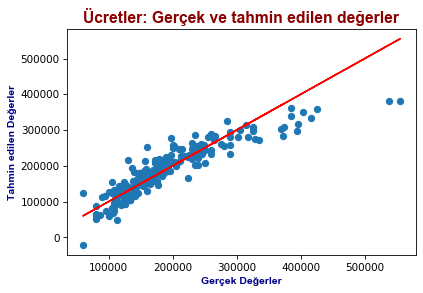

In [12]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

In [13]:

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Hata (MAE)        : 24229.73316602361
Ortalama Kare Hata (MSE)          : 1159672084.4711177
Kök Ortalama Kare Hata (RMSE)     : 34053.958425873454
Ortalama Mutlak Yüzde Hata (MAPE) : 14.141853958011078


## Model 2

In [30]:
X2=df[["OverallQual", "TotalBsmtSF", "GrLivArea", 'GarageCars', 'YearBuilt', 'YearRemodAdd', 'LotArea']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.2, random_state = 465)

print('Eğitim gözlem:', X2_train.shape[0])
print('Test gözlem:', X2_test.shape[0])

Eğitim gözlem: 875
Test gözlem: 219


In [31]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     375.7
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          1.62e-257
Time:                        22:25:00   Log-Likelihood:                -10548.
No. Observations:                 875   AIC:                         2.111e+04
Df Residuals:                     867   BIC:                         2.115e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.145e+06   1.74e+05     -6.564      0.000   -1.49e+06   -8.03e+05
OverallQual    2.18e+04   1745.045     12.490      0.000    1.84e+04    2.52e+04
TotalBsmtSF     19.2101      4.414      4.352      0.000      10.547      27.873
GrLivArea       50.7269      3.808     13.321      0.000      43.253      58.201
GarageCars    1.698e+04   3021.531      5.619      0.000     1.1e+04    2.29e+04
YearBuilt      219.4216     68.337      3.211      0.001      85.296     353.547
YearRemodAdd   314.9928     91.722      3.434      0.001     134.970     495.016
LotArea          0.6485      0.177      3.671      0.000       0.302       0.995
==============================================================================
Omnibus:                      315.783   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32538.309
Skew:                          -0.612   Prob(JB):                         0.00
Kurtosis:                      32.849   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

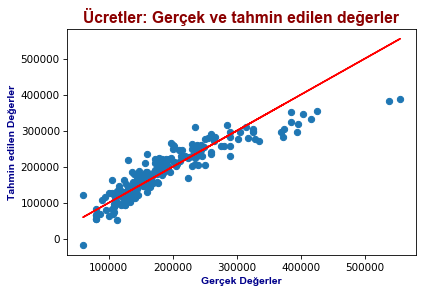

Ortalama Mutlak Hata (MSE)        : 24584.406181017574
Ortalama Kare Hata (MSE)          : 1165525479.0097423
Kök Ortalama Kare Hata (RMSE)     : 34139.79318932296
Ortalama Mutlak Yüzde Hata (MAPE) : 14.149605952224364


In [32]:
X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y2_test, y2_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y2_test, y2_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y2_test - y2_preds) / y2_test)) * 100))

### Bazı değişkenler çıkarıldı, çok aşırı bir değişiklik göze çarpmıyor. Adj R biraz düştü, parametre sayısı azaltıldı, grafikler de çok benzer

## Model 3

In [38]:
df['New2'] = df['GrLivArea'] * df['GarageCars']
Y=df["SalePrice"]
X3=df[["OverallQual", "TotalBsmtSF", 'New2']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size = 0.2, random_state = 465)

print('Eğitim gözlem:', X3_train.shape[0])
print('Test gözlem:', X3_test.shape[0])

Eğitim gözlem: 875
Test gözlem: 219


In [39]:
X3_train = sm.add_constant(X3_train)

results3 = sm.OLS(y3_train, X3_train).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     902.5
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          1.12e-266
Time:                        22:31:45   Log-Likelihood:                -10540.
No. Observations:                 875   AIC:                         2.109e+04
Df Residuals:                     871   BIC:                         2.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.695e+04   7409.498     -7.686      0.000   -7.15e+04   -4.24e+04
OverallQual  2.524e+04   1477.215     17.088      0.000    2.23e+04    2.81e+04
TotalBsmtSF    22.7321      4.131      5.502      0.000      14.624      30.841
New2           19.9003      1.075     18.519      0.000      17.791      22.009
==============================================================================
Omnibus:                      296.619   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16731.488
Skew:                          -0.699   Prob(JB):                         0.00
Kurtosis:                      24.377   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

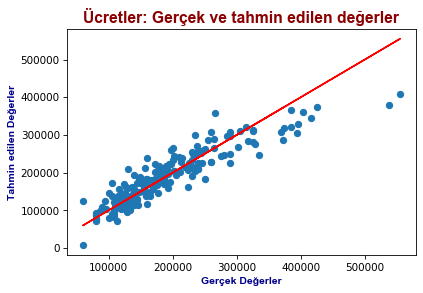

Ortalama Mutlak Hata (MSE)        : 24402.04998148368
Ortalama Kare Hata (MSE)          : 1118978474.5863695
Kök Ortalama Kare Hata (RMSE)     : 33451.13562476421
Ortalama Mutlak Yüzde Hata (MAPE) : 13.772497787233782


In [40]:
X3_test = sm.add_constant(X3_test)

y3_preds = results3.predict(X3_test)

plt.figure(dpi = 75)
plt.scatter(y3_test, y3_preds)
plt.plot(y3_test, y3_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y3_test, y3_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y3_test, y3_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y3_test, y3_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y3_test - y3_preds) / y3_test)) * 100))

In [41]:
df['New'] = df['YearBuilt'] * df['YearRemodAdd']

Y=df["SalePrice"]
X4=df[["OverallQual", "TotalBsmtSF", "GrLivArea", 'GarageCars', 'New', 'FullBath']]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y, test_size = 0.2, random_state = 465)

print('Eğitim gözlem:', X4_train.shape[0])
print('Test gözlem:', X4_test.shape[0])

Eğitim gözlem: 875
Test gözlem: 219


In [42]:
X4_train = sm.add_constant(X4_train)

results4 = sm.OLS(y4_train, X4_train).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     432.5
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          8.61e-257
Time:                        22:32:34   Log-Likelihood:                -10552.
No. Observations:                 875   AIC:                         2.112e+04
Df Residuals:                     868   BIC:                         2.115e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.287e+05   8.51e+04     -7.384      0.000   -7.96e+05   -4.62e+05
OverallQual  2.187e+04   1757.204     12.444      0.000    1.84e+04    2.53e+04
TotalBsmtSF    21.7039      4.250      5.107      0.000      13.362      30.045
GrLivArea      57.2574      4.199     13.637      0.000      49.017      65.498
GarageCars   1.758e+04   3047.820      5.768      0.000    1.16e+04    2.36e+04
New             0.1396      0.023      5.985      0.000       0.094       0.185
FullBath    -8159.4042   3873.666     -2.106      0.035   -1.58e+04    -556.556
==============================================================================
Omnibus:                      316.416   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30856.589
Skew:                          -0.635   Prob(JB):                         0.00
Kurtosis:                      32.064   Cond. No.                     2.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

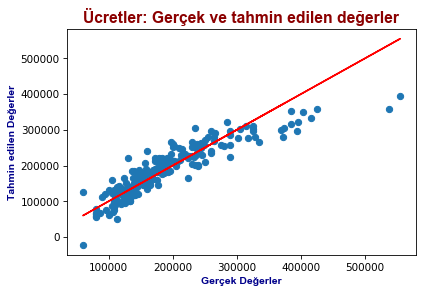

Ortalama Mutlak Hata (MSE)        : 25130.19307863221
Ortalama Kare Hata (MSE)          : 1221097519.718237
Kök Ortalama Kare Hata (RMSE)     : 34944.2058103806
Ortalama Mutlak Yüzde Hata (MAPE) : 14.501707097363504


In [43]:
X4_test = sm.add_constant(X4_test)

y4_preds = results4.predict(X4_test)

plt.figure(dpi = 75)
plt.scatter(y4_test, y4_preds)
plt.plot(y4_test, y4_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y4_test, y4_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y4_test, y4_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y4_test, y4_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y4_test - y4_preds) / y4_test)) * 100))

* Modellerimiz arasında çok büyük farklar olmadı.
* En hata yüzdesi düşük modelimiz Model 3 oldu
* Son durumda Model 3'ü tercih ederdim.